# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library('tidyverse')

df_turbine = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv',
    col_types = cols())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

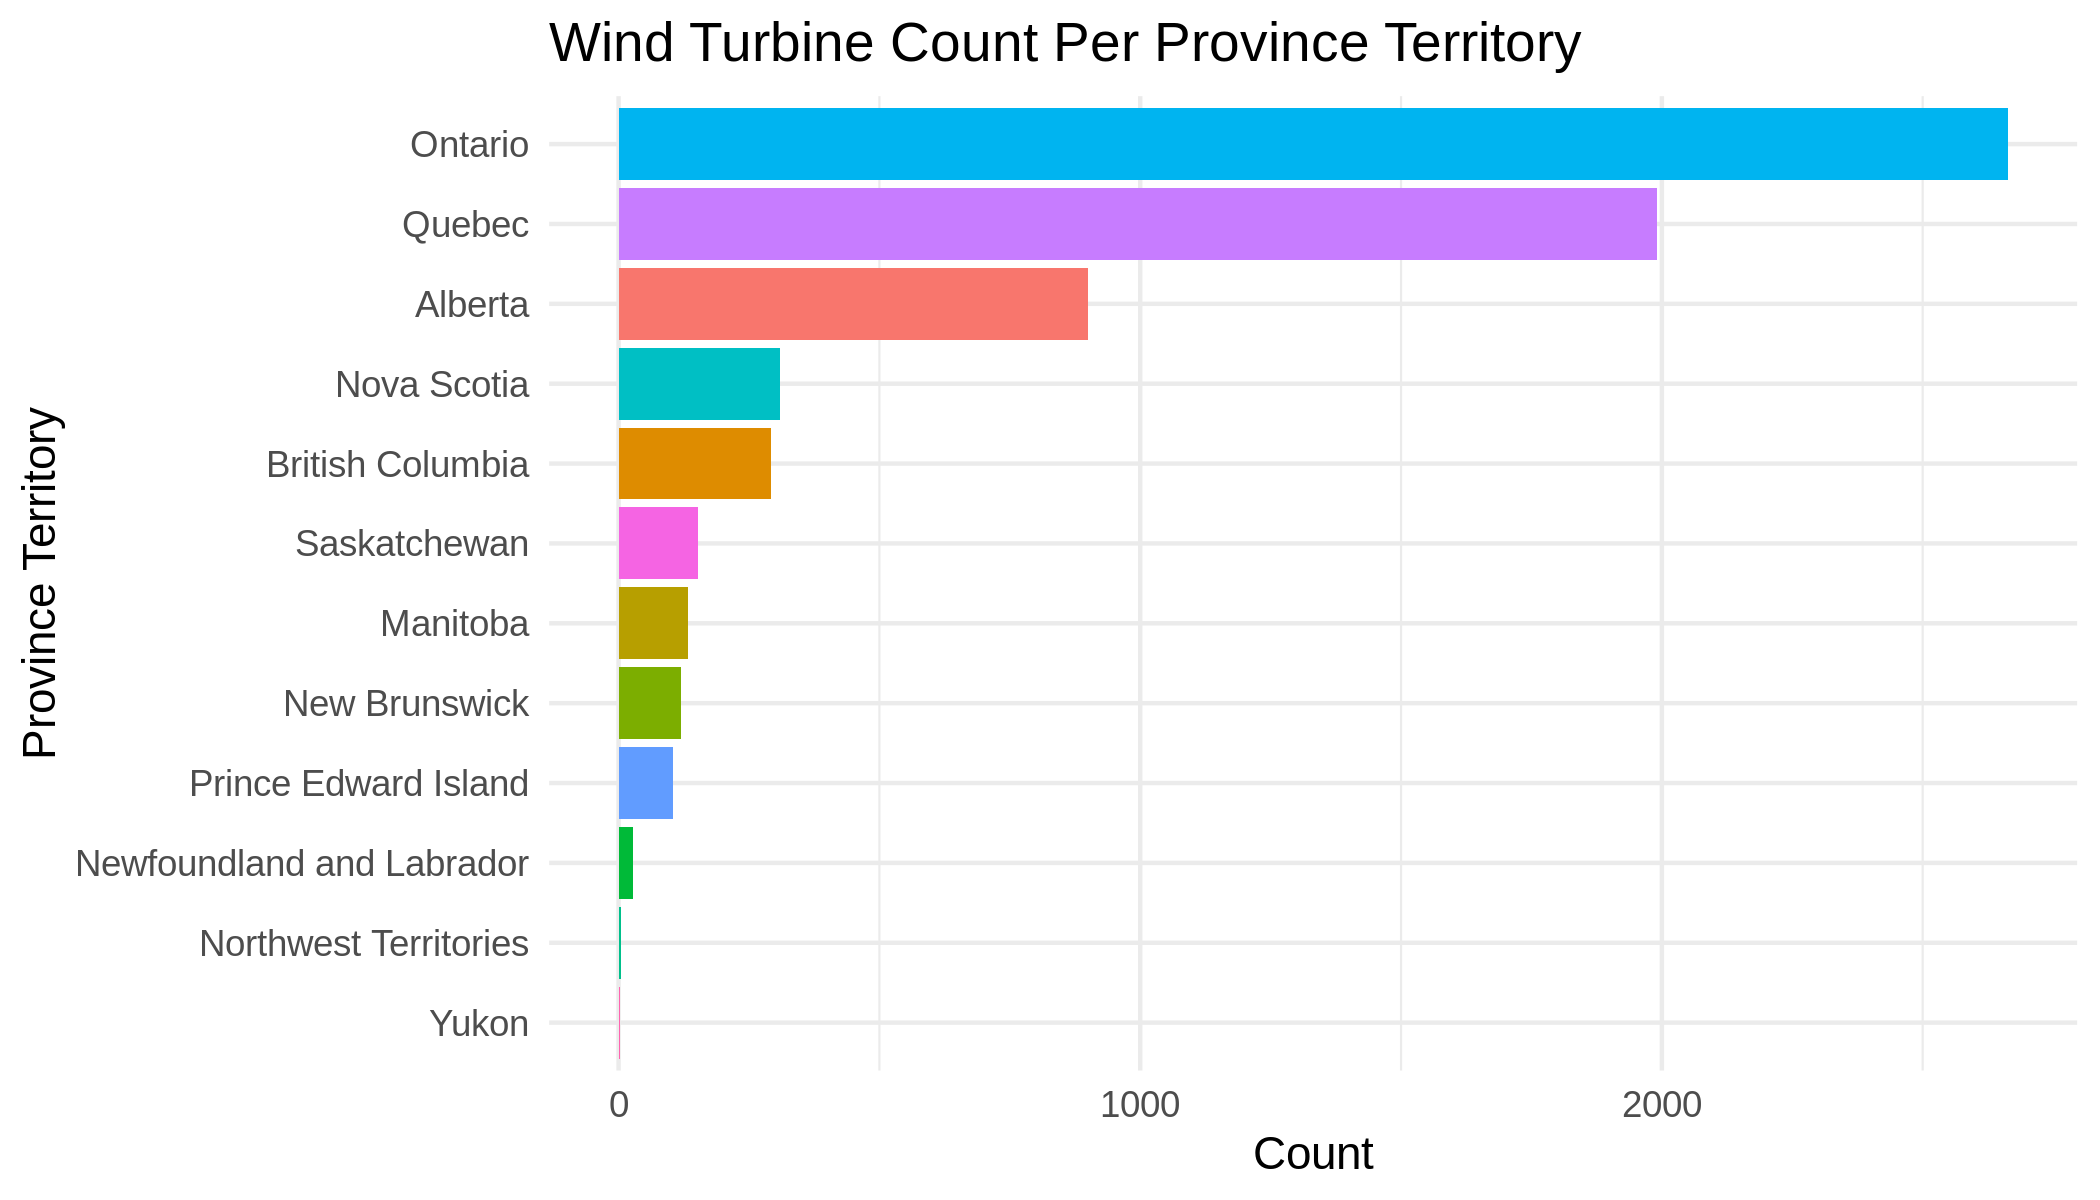

In [32]:
freq_turbine = df_turbine %>%
                group_by(province_territory) %>%
                mutate(n = n()) 

options(repr.plot.res = 300, repr.plot.width = 7, repr.plot.height = 4)

p = ggplot(freq_turbine, aes(y=fct_rev(fct_infreq(province_territory))))

p = p + geom_bar(aes(fill = province_territory))

p = p + theme_minimal()

p = p + theme(legend.position = "none")

p = p + ggtitle("Wind Turbine Count Per Province Territory") + ylab("Province Territory") + xlab("Count")

p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

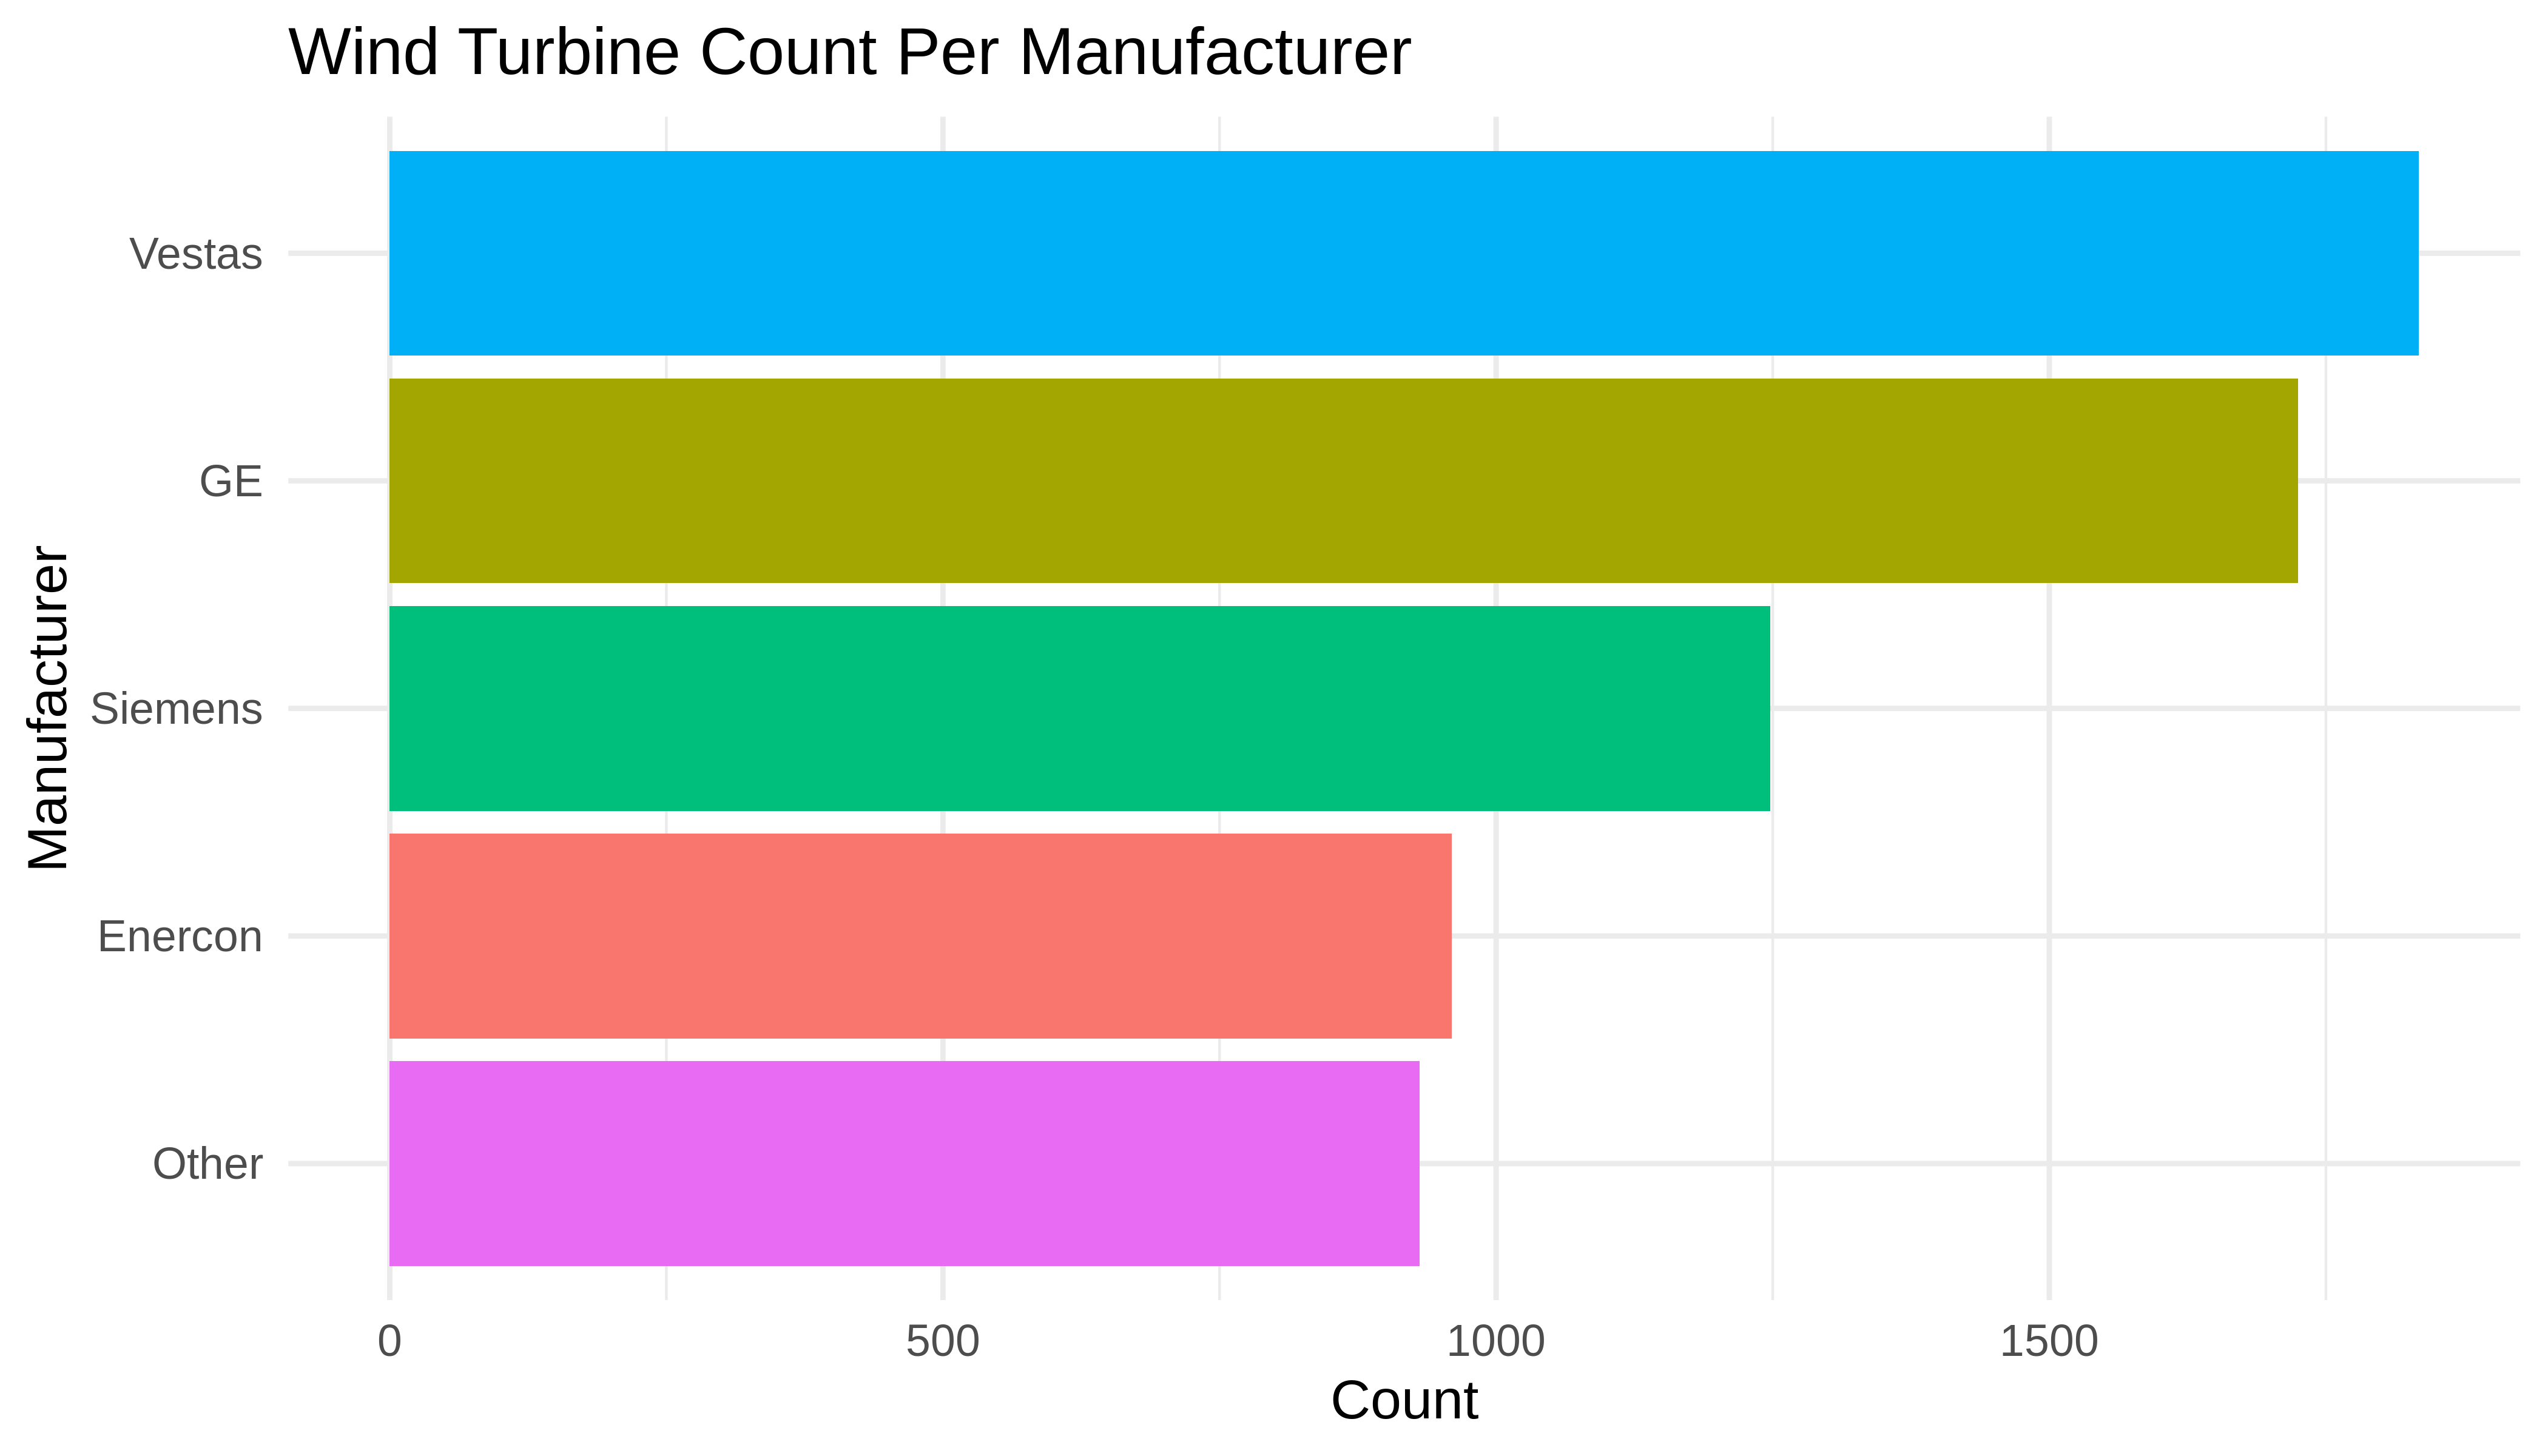

In [31]:
freq_turbine = df_turbine %>%
mutate(manufacturer = fct_lump(manufacturer, prop = .1)) %>%
                group_by(manufacturer) %>%
                mutate(n = n())

options(repr.plot.res = 600, repr.plot.width = 7, repr.plot.height = 4)

p = ggplot(freq_turbine, aes(y=fct_rev(fct_infreq(manufacturer))))

p = p + geom_bar(aes(fill = manufacturer))

p = p + theme_minimal()

p = p + theme(legend.position = "none")

p = p + ggtitle("Wind Turbine Count Per Manufacturer") + ylab("Manufacturer") + xlab("Count")

p